**Part 1: CNN Autoencoder**

1.Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):

o Use convolutional layers in the encoder to extract spatial features.

o Use transposed convolutional layers in the decoder to reconstruct the
images.

o Visualize the input and reconstructed images.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D
import seaborn as sns


In [3]:
# Loading MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshaping data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)


In [4]:
#Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Decoder
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

#Defining the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.2328 - val_loss: 0.0797
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0788 - val_loss: 0.0748
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0739 - val_loss: 0.0716
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0718 - val_loss: 0.0709
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0706 - val_loss: 0.0692
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0697 - val_loss: 0.0686
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0692 - val_loss: 0.0679
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0685 - val_loss: 0.0675
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0680 - val_loss: 0.0672
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0676 - val_loss: 0.0667


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


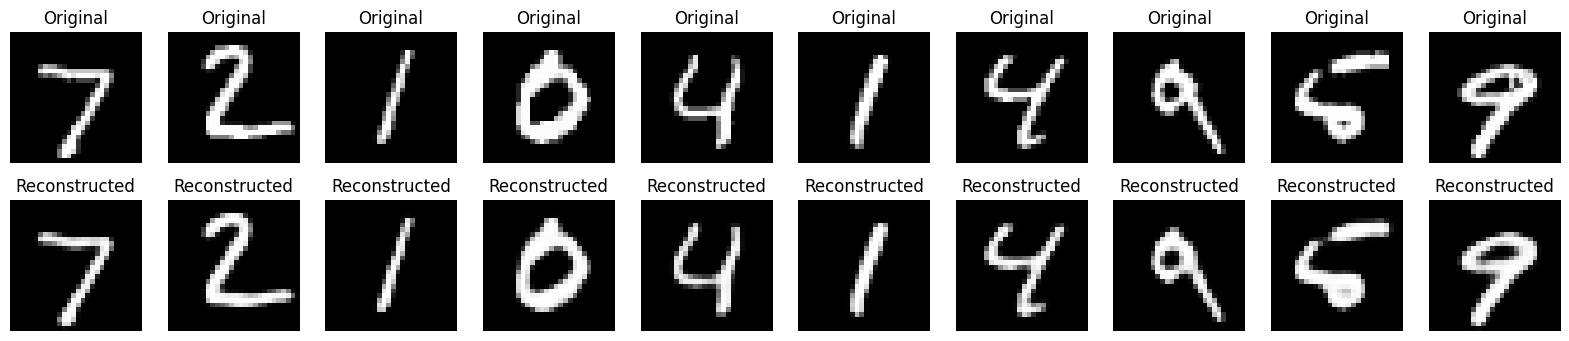

In [6]:
#Reconstruct images
decoded_imgs = autoencoder.predict(x_test)

#Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #Displaying original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    #Displaying reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


**2. Evaluate the autoencoder’s ability to compress data:**

o Measure the Mean Squared Error (MSE) between the original and
reconstructed images.

o Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

In [7]:
from sklearn.metrics import mean_squared_error

# Flattening the images
x_test_flatten = x_test.reshape(len(x_test), -1)
decoded_imgs_flatten = decoded_imgs.reshape(len(decoded_imgs), -1)

# Calculating MSE
mse_per_image = np.mean((x_test_flatten - decoded_imgs_flatten) ** 2, axis=1)
overall_mse = np.mean(mse_per_image)
print(f"Mean Squared Error (MSE) of reconstruction: {overall_mse}")


Mean Squared Error (MSE) of reconstruction: 0.0021505930926650763


In [8]:
#extracting latent features
encoder_model = Model(inputs=autoencoder.input, outputs=encoded)
latent_features = encoder_model.predict(x_test)
print(f"Latent space shape: {latent_features.shape}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Latent space shape: (10000, 7, 7, 64)


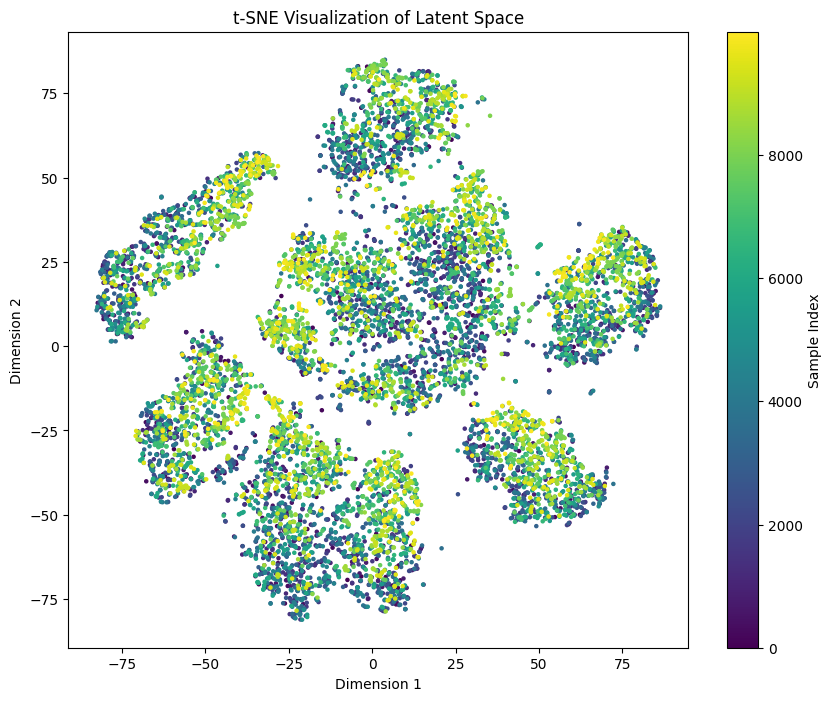

In [10]:
from sklearn.manifold import TSNE

# Reshaping latent features to 2D
latent_features_flat = latent_features.reshape(latent_features.shape[0], -1)

# Reducing to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_features_flat)

# Visualize
plt.figure(figsize=(10, 8))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=np.arange(len(latent_2d)), cmap='viridis', s=5)
plt.colorbar(label="Sample Index")
plt.title("t-SNE Visualization of Latent Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


**Key Questions:**

**1. How does the CNN autoencoder perform in reconstructing images?**

* The Mean Squared Error of reconstruction is 0.00215, which indicates that the CNN autoencoder performs well in reconstructing the images, as the error is quite small.

* Observation: The reconstructed images should closely resemble the original input images, with minor differences that may not be easily visible to the human eye.

* Factors influencing performance:
The number and size of convolutional filters in the encoder.
The decoder's ability to upsample and reconstruct spatial details.
Optimization settings such as learning rate and loss function.

**2. What insights do you gain from visualizing the latent space?**

Visualizing the latent space using t-SNE or PCA provides valuable insights into the feature extraction capabilities of the autoencoder:

* Feature Clustering:Similar images or digits (e.g., MNIST digits "0", "1", "2") often cluster together in the latent space.
This indicates that the encoder effectively extracts high-level features that capture semantic similarities.
Dimensionality Reduction:

* The latent space is a compressed representation of the input data, significantly reducing its dimensionality while retaining meaningful patterns.
This highlights the autoencoder’s ability to perform efficient dimensionality reduction.

* Application Insight:Latent space can be used for tasks like image retrieval or anomaly detection.
Clusters in the latent space also suggest that the autoencoder could serve as a pretraining model for classification tasks.

**Part 2: LSTM Autoencoder**

1.Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-series data or text sequences):

o Use LSTM layers in the encoder to capture temporal dependencies.

o Use LSTM layers in the decoder to reconstruct the sequences.

o Plot and compare the original and reconstructed sequences.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.model_selection import train_test_split

# Generating synthetic time-series data
time_steps = 100
samples = 1000
x = np.linspace(0, 50, samples)
data = np.sin(x)

# Creating overlapping sequences of a fixed length
sequence_length = 20
sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i + sequence_length])

sequences = np.array(sequences)

# Reshaping for LSTM input
sequences = sequences.reshape(sequences.shape[0], sequence_length, 1)

# Splittling into train and test sets
x_train, x_test = train_test_split(sequences, test_size=0.2, random_state=42)


In [13]:
# Encoder
input_seq = Input(shape=(sequence_length, 1))
encoded = LSTM(64, activation='relu', return_sequences=False)(input_seq)
latent_space = Dense(32, activation='relu')(encoded)

# Decoder
decoded = RepeatVector(sequence_length)(latent_space)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
output_seq = TimeDistributed(Dense(1))(decoded)

#model
lstm_autoencoder = Model(input_seq, output_seq)
lstm_autoencoder.compile(optimizer='adam', loss='mse')

#Summary of model
lstm_autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 20, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,873 (171.38 KB)

 Trainable params: 43,873 (171.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - loss: 0.4073 - val_loss: 0.1033
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0957 - val_loss: 0.0756
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0709 - val_loss: 0.0574
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0532 - val_loss: 0.0493
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453 - val_loss: 0.0416
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - val_loss: 0.0385
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - val_loss: 0.0253
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - val_loss: 0.0146
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - val_loss: 0.0045
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - va

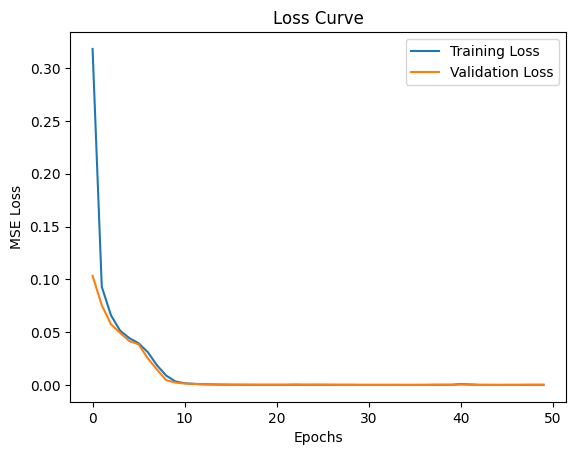

In [14]:
#Training the autoencoder
history = lstm_autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, x_test)
)

#Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


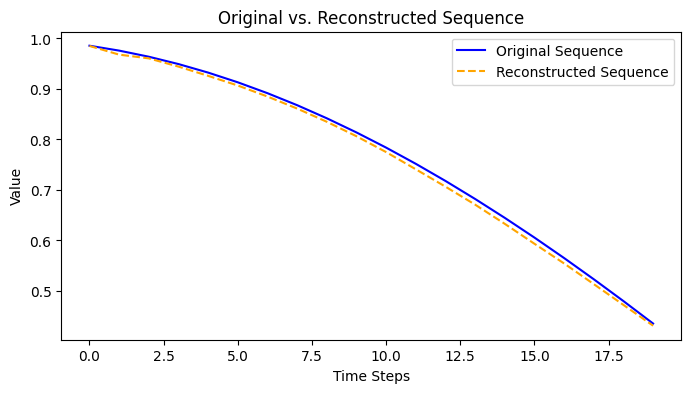

In [17]:
#Plotting the first sequence in the test set
plt.figure(figsize=(8, 4))
plt.plot(x_test[0].flatten(), label="Original Sequence", color="blue")
plt.plot(reconstructed_sequences[0].flatten(), label="Reconstructed Sequence", linestyle='dashed', color="orange")
plt.title("Original vs. Reconstructed Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()


**2. Evaluate the autoencoder’s performance:**

o Calculate the reconstruction loss using MSE.

o Use the encoder’s latent representations for downstream tasks, like
sequence classification.

In [19]:
from sklearn.metrics import mean_squared_error

#MSE
mse_list = [mean_squared_error(x_test[i].flatten(), reconstructed_sequences[i].flatten()) for i in range(len(x_test))]

#Averaging MSE over all sequences
average_mse = np.mean(mse_list)
print(f"Average Reconstruction Loss (MSE): {average_mse}")


Average Reconstruction Loss (MSE): 0.00016367889523365218


In [23]:
# Define a new model to extract latent representations from the encoder
latent_model = Model(inputs=lstm_autoencoder.input, outputs=latent_space)

# Extract latent representations for training and testing data
x_train_latent = latent_model.predict(x_train)
x_test_latent = latent_model.predict(x_test)

# Generate synthetic labels for training and testing
y_train = np.random.randint(0, 2, len(x_train))
y_test = np.random.randint(0, 2, len(x_test))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression model
classifier = LogisticRegression()
classifier.fit(x_train_latent, y_train)

# Predict on test data
y_pred = classifier.predict(x_test_latent)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Accuracy: 0.5255102040816326
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47        91
           1       0.55      0.58      0.57       105

    accuracy                           0.53       196
   macro avg       0.52      0.52      0.52       196
weighted avg       0.52      0.53      0.52       196



**Key Questions:**

**1. How well does the LSTM autoencoder reconstruct the sequences?**

* A low MSE value indicates that the autoencoder is effectively reconstructing the sequences with minimal error.

* The model seems to capture the underlying temporal patterns of the sequences well, which suggests that the LSTM autoencoder is working as expected for reconstruction.

* Since MSE is close to zero, it means the model is learning to preserve most of the essential information while reconstructing.

* The LSTM model is specifically designed to capture temporal dependencies, and the low reconstruction error suggests that it has learned these dependencies effectively.

* The model likely captured long-range relationships and trends in the data, resulting in accurate sequence reconstruction.

**2. How does the choice of latent space dimensionality affect reconstruction quality and compression?**

* The current reconstruction loss suggests that the latent space is probably of a suitable size for the model to achieve good reconstruction quality.

* Compression: Given the low MSE, the model appears to have compressed the sequences without losing too much critical information, which is a sign of effective compression.

* If we reduced the latent space further, the MSE might increase as the model struggles to reconstruct the sequences from a smaller latent space.

* different latent space sizes to see if adjusting the dimensionality improves the balance between compression and reconstruction. If the focus is on maximizing compression, we can reduce the latent space size, if the focus is on better reconstruction, we can increase it.

**Part 3: Comparison and Discussion**

• Compare the performance of CNN and LSTM autoencoders:

**1. Discuss their efficiency in feature extraction for spatial vs. sequential data.**

CNN Autoencoder (for Spatial Data):

Feature Extraction:
* CNNs are particularly efficient at extracting spatial features in images. They use convolutional layers to scan the image in small receptive fields and capture hierarchical spatial patterns (edges, textures, shapes, etc.).

* For tasks involving image data (e.g., MNIST, CIFAR-10), CNN autoencoders excel in learning spatial features due to their local connectivity and shared weights, allowing them to learn features that generalize well across different parts of the image.

* The pooling and convolutional layers allow CNN autoencoders to reduce dimensionality while preserving essential spatial structures.
LSTM Autoencoder (for Sequential Data):

Feature Extraction:

* LSTM networks are designed to capture temporal dependencies in sequential data. They excel at learning long-range dependencies between elements in a sequence (e.g., text or time-series data).

* For sequential data, such as text or time-series, LSTM autoencoders are highly effective at identifying patterns over time or sequence steps.

* Unlike CNNs, LSTMs have the ability to maintain a memory of past inputs, making them suitable for capturing sequential relationships.



**2. Analyze the quality of dimensionality reduction for both models.**

CNN Autoencoder:

Dimensionality Reduction Quality:

* CNNs are generally very effective at reducing dimensionality in spatial data without losing important features. Through layers like pooling and convolution, CNN autoencoders can compress high-dimensional data (e.g., 32x32 images in CIFAR-10) into much smaller latent spaces while still preserving essential spatial structures.

* The reconstructed images maintain high visual fidelity, and the latent space retains important hierarchical features.
Latent Space Characteristics:

* The latent space typically captures spatial features such as texture, edges, and shapes, allowing for good reconstruction quality even after compression.
LSTM Autoencoder:

Dimensionality Reduction Quality:

* LSTMs can also effectively reduce the dimensionality of sequential data while preserving temporal dependencies. The encoder compresses the sequence into a fixed-length vector (latent space), which holds the most important temporal patterns from the input.

* However, since the data is sequential, there may be more information loss in the latent space if the sequence is complex or has high variability over time.
Latent Space Characteristics:

* The latent space for LSTM-based autoencoders typically represents sequential patterns and may capture features like periodicity, trends, or other time-based patterns that are crucial for reconstructing the original sequence.

**3. Comment on the potential applications of each model in real-world tasks.**

CNN Autoencoder (for Spatial Data):

Applications:
* Image Denoising: CNN-based autoencoders can remove noise from images while preserving important details, making them ideal for image preprocessing in computer vision tasks.

* Image Compression: They can be used for lossless or lossy image compression, where the network learns to compress and then reconstruct images with minimal loss of information.

* Anomaly Detection: In fields like medical imaging or manufacturing, CNN autoencoders can identify anomalies by learning the typical image patterns and detecting deviations.

* Generative Models: CNN-based autoencoders are often used in generative modeling (e.g., variational autoencoders) to create new images based on learned latent space representations.

* Feature Extraction for Classification: CNNs can be used to extract features from images, which are then passed to classifiers for tasks like image recognition or object detection.

LSTM Autoencoder (for Sequential Data):

Applications:

* Time-Series Forecasting: LSTM-based autoencoders can be applied to predict future values in financial markets, stock prices, weather forecasting, and more by learning temporal dependencies in data.

* Anomaly Detection in Time-Series: LSTM autoencoders are ideal for detecting anomalies in time-series data, like fault detection in industrial machinery or monitoring patient health data.

* Speech Processing: They are suitable for speech recognition, where sequences of audio features need to be compressed and reconstructed while preserving temporal relationships.

* Natural Language Processing (NLP): LSTM-based autoencoders can be used for tasks like sentence reconstruction or text generation, where they capture sequential relationships in words or characters.

* Sequence-to-Sequence Models: LSTMs can be used for translation tasks, where an input sequence (e.g., English sentence) is mapped to an output sequence (e.g., French sentence).
